# Megafon 

## Steps

1. First look at data
    - read train test
    - common ids
    - read features (20 GB)
    - 



### First look at data

#### Read train test

In [267]:
import pandas as pd
import numpy as np
import dask.dataframe as dd  # for big file feature.csv ~20 Gb
import matplotlib.pyplot as plt
import datetime

In [3]:
train = pd.read_csv('data/data_train.csv', index_col=0)
train.head(2)

,id,vas_id,buy_time,target
0,540968,8.0,1537131600,0.0
1,1454121,4.0,1531688400,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831653 entries, 0 to 831652
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        831653 non-null  int64  
 1   vas_id    831653 non-null  float64
 2   buy_time  831653 non-null  int64  
 3   target    831653 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 31.7 MB


#### Look at Target distribution

0.0    0.927631
1.0    0.072369
Name: target, dtype: float64

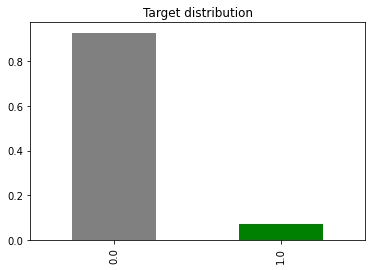

In [5]:
(train['target'].value_counts()/train['target'].shape[0]).\
    plot(kind='bar', title='Target distribution', color = ['grey', 'blue']);
train['target'].value_counts()/train['target'].shape

not very balanced sample

In [6]:
test = pd.read_csv('data/data_test.csv', index_col=0)
test.head(2)

,id,vas_id,buy_time
0,3130519,2.0,1548018000
1,2000860,4.0,1548018000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71231 entries, 0 to 71230
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        71231 non-null  int64  
 1   vas_id    71231 non-null  float64
 2   buy_time  71231 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.2 MB


#### Common ids

There are extra indexes in the `feature.csv` file. Need to select rows without them.

In [8]:
train_ids = set(train.id.tolist())
test_ids = set(test.id.tolist())
common_ids = train_ids.union(test_ids)

print(f'Number train indexes: {len(train_ids)} \n\
Number test indexes: {len(test_ids)} \nNumber common indexes: {len(common_ids)}')

Number train indexes: 806613 
Number test indexes: 70152 
Number common indexes: 872577


#### Read features (20 GB)

In [9]:
features = dd.read_csv('data/features.csv', sep='\t')
features

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
npartitions=351,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [10]:
features = features[features.id.isin(common_ids)].compute()
features.head(2)

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
13,13,2046132,1534712400,300.820029,1599.480888,286.879214,1585.013202,281.461754,1563.90821,-16.08618,...,-977.373846,-613.770792,-25.996269,-35.630448,-295.747724,-17.832889,-0.694428,-4.175933,-0.45614,0.0
16,16,2050810,1540760400,-86.209971,91.820888,-84.480786,110.333202,-89.898246,89.22821,-16.08618,...,-977.373846,-613.770792,-23.996269,190.369552,-286.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [11]:
features.drop(columns='Unnamed: 0', inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902389 entries, 13 to 12844
Columns: 255 entries, id to 252
dtypes: float64(253), int64(2)
memory usage: 1.7 GB


- time

Changing time format

In [12]:
train['buy_time'] = pd.to_datetime(train['buy_time'], unit='s')
test['buy_time'] = pd.to_datetime(test['buy_time'], unit='s')
features['buy_time'] = pd.to_datetime(features['buy_time'], unit='s')
train.head(2)

,id,vas_id,buy_time,target
0,540968,8.0,2018-09-16 21:00:00,0.0
1,1454121,4.0,2018-07-15 21:00:00,0.0


In [13]:
features.rename( columns={'buy_time':'update_info_time' } ,inplace=True) 

#### Time

Sorting the target variable by time and visualization

In [14]:
time_buy = train[train['target'] == 1].buy_time.sort_values(ascending=False).value_counts(sort=False)
time_notbuy = train[train['target'] == 0].buy_time.sort_values(ascending=False).value_counts(sort=False)

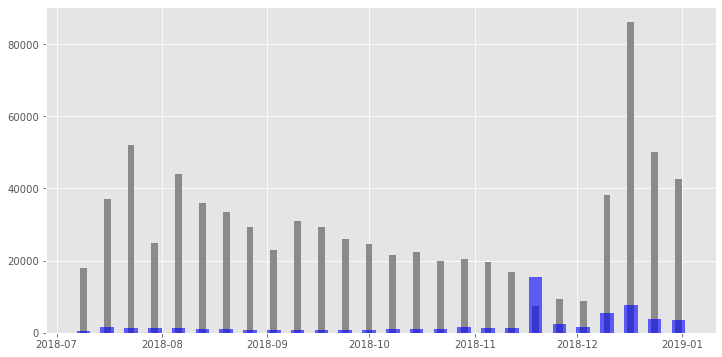

In [134]:
plt.figure(figsize=(12, 6))
plt.bar(time_notbuy.index, time_notbuy, width=2, color='grey', alpha=0.9)
plt.bar(time_buy.index, time_buy, width=4, color='b', alpha=0.6)
# plt.yscale('log')
plt.show()

Seasonal distribution of purchases and **peak** sales on the same day in November (Sale). Using incomplete seasonal data to evaluate the model is not the best solution. But we don't have another data.

We can try to make the last month (December) as a validation sample

In [16]:
def unique_ids(df):
    return df.groupby(by='id')['id'].agg('count').value_counts()

In [17]:
unique_ids(train)

1    781611
2     24964
3        38
Name: id, dtype: int64

In [18]:
unique_ids(test)

1    69092
2     1041
3       19
Name: id, dtype: int64

In [19]:
unique_ids(features)

1    842765
2     29812
Name: id, dtype: int64

Most of the indices are unique, but there are those that occur two or three times.

In [20]:
thrice_ids = train.groupby(by='id')['id'].agg('count')[train.groupby(by='id')['id'].agg('count') == 3].index.tolist()

In [21]:
tr_temp = train[train['id'].isin(set(thrice_ids) & common_ids)].head(100)
tr_temp.head(9)

,id,vas_id,buy_time,target
21564,1144355,4.0,2018-12-16 21:00:00,0.0
21565,1144355,4.0,2018-12-23 21:00:00,0.0
21566,1144355,6.0,2018-12-16 21:00:00,1.0
24239,3475168,1.0,2018-12-16 21:00:00,0.0
24240,3475168,4.0,2018-11-18 21:00:00,0.0
24241,3475168,6.0,2018-11-18 21:00:00,1.0
24631,271692,2.0,2018-11-25 21:00:00,0.0
24632,271692,4.0,2018-12-30 21:00:00,0.0
24633,271692,6.0,2018-12-30 21:00:00,1.0


#### Perform an asof merge.

In [22]:
def merge_asof(left, right, ids):
    left = pd.merge_asof(left.sort_values(by=['buy_time']), 
                         right[features.id.isin(ids)].sort_values(by=['update_info_time']), 
                         left_on='buy_time', 
                         right_on='update_info_time', 
                         by='id',
                         direction='nearest'  # with nearest time
                         )
    return left

In [23]:
%%time
train = merge_asof(train, features, train_ids)
train.head(2)

CPU times: user 7.54 s, sys: 12 s, total: 19.5 s
Wall time: 26.3 s


,id,vas_id,buy_time,target,update_info_time,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
0,2582523,2.0,2018-07-08 21:00:00,0.0,2018-12-16 21:00:00,314.560029,9.290888,342.989214,7.523202,337.571754,...,6488.626154,-574.770792,-24.996269,121.369552,142.252276,-16.832889,-0.694428,-11.175933,-0.45614,0.0
1,1292549,2.0,2018-07-08 21:00:00,0.0,2018-09-16 21:00:00,93.880029,-217.499112,79.939214,-270.106798,74.521754,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [24]:
%%time
test = merge_asof(test, features, test_ids)
test.head(2)

CPU times: user 823 ms, sys: 2.91 s, total: 3.74 s
Wall time: 5.07 s


,id,vas_id,buy_time,update_info_time,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,2905850,5.0,2019-01-06 21:00:00,2018-09-09 21:00:00,326.930029,227.410888,312.989214,200.223202,307.571754,179.11821,...,-464.373846,-104.770792,-25.996269,-18.630448,-209.747724,-15.832889,-0.694428,-2.175933,-0.45614,0.0
1,31619,2.0,2019-01-06 21:00:00,2018-09-09 21:00:00,-96.799971,100.290888,-62.040786,250.953202,-67.458246,229.84821,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


### Baseline

In [129]:
from lightgbm import LGBMClassifier

from sklearn.metrics import precision_recall_curve, roc_curve, classification_report, f1_score, auc
plt.style.use('ggplot')

#### Train valid split

Let's try to make the last month (December) as a validation sample

In [292]:
SPLIT_DATE = np.datetime64('2018-12-01T00:00:00')

In [36]:
train.set_index('id', inplace=True)
test.set_index('id', inplace=True)

In [423]:
%%time
X_train = train[train['buy_time'] < SPLIT_DATE]
X_val = train[train['buy_time'] >= SPLIT_DATE]

y_train = X_train['target']
y_val = X_val['target']

pd.options.mode.chained_assignment = None  # avoid warning

# convert time to timestamp int64
X_train.loc[:, 'buy_time'] = X_train.loc[:, 'buy_time'].values.astype(np.int64) // 10 ** 9
X_train.loc[:, 'update_info_time'] = X_train['update_info_time'].values.astype(np.int64) // 10 ** 9

X_val.loc[:, 'buy_time'] = X_val.loc[:, 'buy_time'].values.astype(np.int64) // 10 ** 9
X_val.loc[:, 'update_info_time'] = X_val.loc[:, 'update_info_time'].values.astype(np.int64) // 10 ** 9

X_train = X_train.drop(columns='target')
X_val = X_val.drop(columns='target')

CPU times: user 1.82 s, sys: 6.4 s, total: 8.22 s
Wall time: 12.5 s


In [422]:
# X_train = X_train.drop(columns=['target', 'buy_time', 'update_info_time'])
# X_val = X_val.drop(columns=['target', 'buy_time', 'update_info_time'])

In [424]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((584073, 256), (584073,), (247580, 256), (247580,))

In [425]:
lgb = LGBMClassifier(objective='binary', random_state=1)

In [426]:
%%time

lgb.fit(X_train, y_train)

CPU times: user 1min, sys: 8.82 s, total: 1min 9s
Wall time: 23.3 s


LGBMClassifier(objective='binary', random_state=1)

In [427]:
train_preds = lgb.predict_proba(X_val)

In [428]:
train_preds[:, 1]

array([0.0413033 , 0.0194948 , 0.0207647 , ..., 0.01931128, 0.01943847,
       0.02280166])

In [429]:
f1_score(y_val, train_preds[:, 1] >= 0.5, average='macro')

0.7157219020192569

#### Looking for the best threshold

In [430]:
def find_best_threshold(y_true, y_pred, do_print=False):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    fscore = (2 * precision * recall) / (precision + recall)
    
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    best_threshold = thresholds[ix]
    if do_print:
        print(f'Best Threshold = {best_threshold:.3f}, F-Score = {fscore[ix]:.3f}, \
Precision = {precision[ix]:.3f}, Recall = {recall[ix]:.3f}')
    return best_threshold

In [431]:
best_threshold = find_best_threshold(y_val, train_preds[:, 1], do_print=True)

Best Threshold = 0.342, F-Score = 0.573, Precision = 0.426, Recall = 0.874


In [432]:
f1_score(y_val, train_preds[:, 1] >= best_threshold, average='macro')

0.7527643107972051

In [433]:
print(classification_report(y_val, train_preds[:, 1] >= best_threshold))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93    225378
         1.0       0.43      0.87      0.57     22202

    accuracy                           0.88    247580
   macro avg       0.71      0.88      0.75    247580
weighted avg       0.94      0.88      0.90    247580



#### Visualisation. ROC Curve, PR Curve

In [230]:
def plot_roc_curve(y_true, y_pred, model_name="Noname", color='b', ax=None):
    fpr, tpr, roc_thresholds = roc_curve(y_true, y_pred)
    
    plt.figure(figsize=(6, 6)) 
    plt.plot(fpr, tpr, label='%s: ROC Curve (area = %0.3f)' %
             (model_name, auc(fpr, tpr)), color=color)
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

In [231]:
def plot_precision_recall_curve(y_true, y_pred, model_name="Noname", color='b'):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    
    plt.figure(figsize=(6, 6)) 
    plt.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.3f)' %
             (model_name, auc(recall, precision)), color=color)
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Precision-Recall curve")
    plt.legend(loc="lower left")

In [232]:
# plot_roc_curve(y_val, train_preds[:, 1], "Baseline", color='b')
# plot_precision_recall_curve(y_val, train_preds[:, 1], "Baseline", color='b')

In [434]:
def plot_roc_pr_curve(y_true, y_pred, model_name="Noname", color='b'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # plot ROC Curve
    fpr, tpr, roc_thresholds = roc_curve(y_true, y_pred)
    ax1.plot(fpr, tpr, label='%s: ROC Curve (area = %0.3f)' %
             (model_name, auc(fpr, tpr)), color=color)
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.axis([0.0, 1.0, 0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve')
    ax1.legend(loc="lower right")
    
    # plot Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    ax2.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.3f)' %
             (model_name, auc(recall, precision)), color=color)
    ax2.axis([-0.05, 1.05, 0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title("Precision-Recall curve")
    ax2.legend(loc="lower left")

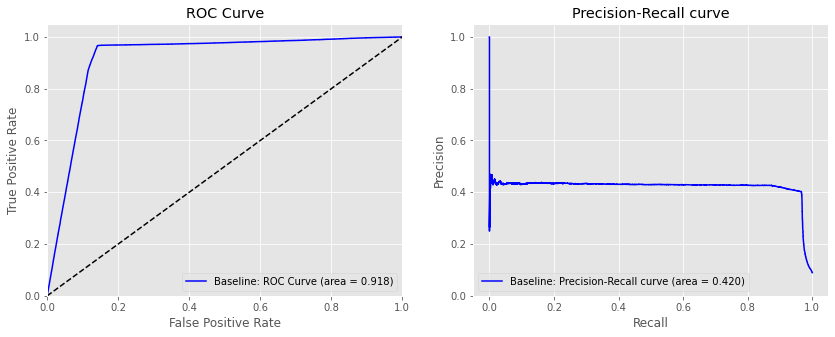

In [435]:
plot_roc_pr_curve(y_val, train_preds[:, 1], "Baseline", color='b')

#### Conclusion for baseline:

Not so bad performance for the baseline.

### Features

#### Data type of features

In [139]:
%%time
f = features.copy()
f.set_index('id', inplace=True)

print("Are there duplicates in the rows? --> ", f.duplicated().sum())
print("What percentage features can be Null? --> %d%%" % float((f.isnull().sum() > 0).sum()/f.shape[1]*100))

Are there duplicates in the rows? -->  1422
What percentage features can be Null? --> 0%
CPU times: user 9.71 s, sys: 10.9 s, total: 20.6 s
Wall time: 27.1 s


In [222]:
f[f.duplicated()]

,update_info_time,0,1,2,3,4,5,6,7,8,...,243,244,245,246,247,248,249,250,251,252
id,,,,,,,,,,,,,,,,,,,,,
3121327,2018-12-23 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,-6.78366,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1638049,2018-12-23 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,-6.78366,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3494546,2019-01-06 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,-6.78366,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2926951,2018-12-09 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,-6.78366,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2928399,2018-12-16 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,-6.78366,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220470,2018-12-16 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,-6.78366,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2150126,2018-12-16 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,-6.78366,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2776020,2018-08-26 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,-6.78366,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [231]:
features[ features['id'].isin([3121327, 1638049])]

,id,update_info_time,0,1,2,3,4,5,6,7,...,243,244,245,246,247,248,249,250,251,252
3082,3121327,2018-12-23 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
11410,1638049,2018-12-23 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [232]:
train[train['id'].isin([3121327, 1638049])]

,id,vas_id,buy_time,target,update_info_time,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
171499,1638049,1.0,2018-08-05 21:00:00,0.0,2018-12-23 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
172919,3121327,1.0,2018-08-05 21:00:00,0.0,2018-12-23 21:00:00,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


This looks very strange. How can two persons be exactly the same?

But, ok. Let's look at data types.

In [258]:
f.drop(columns='update_info_time', inplace=True)  # we don't need a date
F_nunique = f.apply(lambda x: x.nunique())

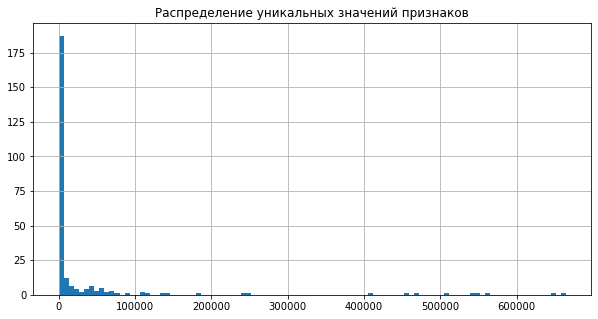

In [259]:
plt.title("Distribution of unique feature values");
F_nunique.hist(bins=100, figsize=(10, 5));

In [260]:
f_all = set(F_nunique.index.tolist())
len(f_all)

253

#### Constant features

In [261]:
f_const = set(F_nunique[F_nunique == 1].index.tolist())
len(f_const)

5

In [262]:
f_const

{'139', '203', '75', '81', '85'}

In [267]:
f[list(f_const)].head(2)

,81,85,75,203,139
id,,,,,
2046132,0.0,0.0,0.0,0.0,0.0
2050810,0.0,0.0,0.0,0.0,0.0


#### Numeric features

In [273]:
f_numeric = (f.astype(int).sum() - f.sum()).abs()
f_numeric = set(f_numeric[f_numeric > 0].index.tolist())
len(f_numeric)

247

#### Categorical features

In [275]:
f_other = f_all - (f_numeric | f_const)
len(f_other)

1

In [276]:
f_other

{'252'}

In [283]:
f[list(f_other)].value_counts().shape

(34,)

In [282]:
f[list(f_other)].value_counts()

252   
0.0       674453
1.0       227888
2.0            5
8.0            3
3.0            3
4.0            3
10.0           3
11.0           2
13.0           2
7.0            2
5.0            2
446.0          1
77.0           1
299.0          1
284.0          1
283.0          1
251.0          1
223.0          1
195.0          1
182.0          1
84.0           1
82.0           1
24.0           1
68.0           1
44.0           1
42.0           1
36.0           1
23.0           1
22.0           1
19.0           1
18.0           1
16.0           1
6.0            1
1743.0         1
dtype: int64

It looks like a categorical feature, with some very rare objects.

In [294]:
train[train['252'] >= 2].target.value_counts()

0.0    39
1.0     4
Name: target, dtype: int64

In [306]:
train[(train['252'] >= 2) & (train['target'] == 1)]

,id,vas_id,buy_time,target,update_info_time,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
320995,4123710,2.0,2018-09-09 21:00:00,1.0,2018-07-15 21:00:00,-96.799971,-24.699112,-110.740786,-77.306798,-116.158246,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,2.0
412050,1809707,6.0,2018-09-30 21:00:00,1.0,2018-09-02 21:00:00,495.570029,186.730888,481.629214,134.123202,476.211754,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,3.0
536191,3906738,4.0,2018-11-11 21:00:00,1.0,2018-09-09 21:00:00,540.910029,233.770888,526.969214,181.163202,521.551754,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,11.0
651830,2215612,6.0,2018-12-16 21:00:00,1.0,2018-10-21 21:00:00,-96.799971,-399.699112,-110.740786,-452.306798,-114.038246,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,182.0


Since there are 10% of targets equal to 1, then we cannot easily equate these categories with the largest strata (0, 1).